# **Heart Failure Prediction**



### Aim :
- To classify / predict whether a patient is prone to heart failure depending on multiple attributes.
- It is a **binary classification** with multiple numerical and categorical features.

### <center>Dataset Attributes</center>
    
- **Age** : age of the patient [years]
- **Sex** : sex of the patient [M: Male, F: Female]
- **ChestPainType** : chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- **RestingBP** : resting blood pressure [mm Hg]
- **Cholesterol** : serum cholesterol [mm/dl]
- **FastingBS** : fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- **RestingECG** : resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- **MaxHR** : maximum heart rate achieved [Numeric value between 60 and 202]
- **ExerciseAngina** : exercise-induced angina [Y: Yes, N: No]
- **Oldpeak** : oldpeak = ST [Numeric value measured in depression]
- **ST_Slope** : the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- **HeartDisease** : output class [1: heart disease, 0: Normal]

# **Data Collection**

### Import the Necessary Libraries :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Read the csv file
df= pd.read_csv("C:/Users/risha/OneDrive/Desktop/BAIS/Project/Heart Failure Prediction/heart.csv")

In [3]:
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40.0,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0.0
1,49.0,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1.0
2,37.0,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0.0
3,48.0,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1.0
4,54.0,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0.0
5,39.0,M,NAP,120,339.0,0,Normal,170,N,0.0,Up,0.0
6,45.0,F,ATA,130,237.0,0,Normal,170,N,0.0,Up,NaN
7,54.0,M,ATA,110,208.0,0,Normal,142,N,0.0,Up,0.0
8,37.0,M,ASY,140,207.0,0,Normal,130,Y,1.5,Flat,1.0
9,48.0,F,ATA,120,284.0,0,Normal,120,N,0.0,Up,0.0


### Data Info :

In [4]:
#Get the dataset shape
df.shape

(918, 12)

In [5]:
#Get Columns in dataset
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             900 non-null    float64
 1   Sex             918 non-null    object 
 2   ChestPainType   905 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     909 non-null    float64
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    910 non-null    float64
dtypes: float64(4), int64(3), object(5)
memory usage: 86.2+ KB


In [7]:
#Find the Null values in the dataset parameters
df.isna().sum(0)

Age               18
Sex                0
ChestPainType     13
RestingBP          0
Cholesterol        9
FastingBS          0
RestingECG         0
MaxHR              0
ExerciseAngina     0
Oldpeak            0
ST_Slope           0
HeartDisease       8
dtype: int64

# Dealing with Misssing Values in the Dataset:
There are two ways:

1. **Imputing the dataset**: We used mean imputation for numerical variables and mode imputation for categorical variables






In [8]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,900.000000,918.000000,909.000000,918.000000,918.000000,918.000000,910.000000
mean,53.620000,132.396514,198.275028,0.233115,136.809368,0.887364,0.553846
std,9.414922,18.514154,109.688241,0.423046,25.460334,1.066570,0.497365
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,172.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,222.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [9]:
#Replacing the missing values into the mean of the dataset.
mean_age= df["Age"].mean()
df["Age"]=df["Age"].fillna(mean_age)

In [10]:
#Replacing the missing values into the mean of the dataset.
mean_chol= df["Cholesterol"].mean()
df["Cholesterol"]=df["Cholesterol"].fillna(mean_chol)

In [11]:
#Filling the ChestPainType parameter with the most common value for the parameter.
mode_ChestPainType= df["ChestPainType"].mode()[0]
print(mode_ChestPainType)
df["ChestPainType"]=df["ChestPainType"].fillna(mode_ChestPainType)

ASY


In [12]:
#Replacing the missing values into the mode of the dataset.
mode_heartDisease= df["HeartDisease"].mode()[0]
print(mode_heartDisease)
df["HeartDisease"]=df["HeartDisease"].fillna(mode_heartDisease)

1.0


In [13]:
df.isna().sum(0)

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    float64
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    float64
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    float64
dtypes: float64(4), int64(3), object(5)
memory usage: 86.2+ KB


In [15]:
#selecting numerical columns
numerical_Columns= df.select_dtypes(include= ['float64', 'int64'])

In [16]:
#Finding the number of O's and number of 1's
df["ChestPainType"].value_counts()

ChestPainType
ASY    506
NAP    200
ATA    167
TA      45
Name: count, dtype: int64

# **Exploratory Data Analysis**

### Dividing features into Numerical and Categorical :

In [17]:
col = list(df.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(df[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : Sex ChestPainType FastingBS RestingECG ExerciseAngina ST_Slope HeartDisease
Numerical Features : Age RestingBP Cholesterol MaxHR Oldpeak


- Here, categorical features are defined if the the attribute has less than 6 unique elements else it is a numerical feature.
- Typical approach for this division of features can also be based on the datatypes of the elements of the respective attribute.

**Eg :** datatype = integer, attribute = numerical feature ; datatype = string, attribute = categorical feature

- For this dataset, as the number of features are less, we can manually check the dataset as well.

### Categorical Features :

In [18]:
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40.0,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0.0
1,49.0,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1.0
2,37.0,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0.0
3,48.0,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1.0
4,54.0,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0.0
5,39.0,M,NAP,120,339.0,0,Normal,170,N,0.0,Up,0.0
6,45.0,F,ATA,130,237.0,0,Normal,170,N,0.0,Up,1.0
7,54.0,M,ATA,110,208.0,0,Normal,142,N,0.0,Up,0.0
8,37.0,M,ASY,140,207.0,0,Normal,130,Y,1.5,Flat,1.0
9,48.0,F,ATA,120,284.0,0,Normal,120,N,0.0,Up,0.0


In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_transformed = df.copy(deep = True)

data_transformed['Sex'] = le.fit_transform(data_transformed['Sex'])
#Similarly for ChestPainType, RestingECG, ExerciseAngina, ST_Slope
data_transformed['ChestPainType'] = le.fit_transform(data_transformed['ChestPainType'])
data_transformed['RestingECG'] = le.fit_transform(data_transformed['RestingECG'])
data_transformed['ExerciseAngina'] = le.fit_transform(data_transformed['ExerciseAngina'])
data_transformed['ST_Slope'] = le.fit_transform(data_transformed['ST_Slope'])


In [20]:
data_transformed.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40.0,1,1,140,289.0,0,1,172,0,0.0,2,0.0
1,49.0,0,2,160,180.0,0,1,156,0,1.0,1,1.0
2,37.0,1,1,130,283.0,0,2,98,0,0.0,2,0.0
3,48.0,0,0,138,214.0,0,1,108,1,1.5,1,1.0
4,54.0,1,2,150,195.0,0,1,122,0,0.0,2,0.0
5,39.0,1,2,120,339.0,0,1,170,0,0.0,2,0.0
6,45.0,0,1,130,237.0,0,1,170,0,0.0,2,1.0
7,54.0,1,1,110,208.0,0,1,142,0,0.0,2,0.0
8,37.0,1,0,140,207.0,0,1,130,1,1.5,1,1.0
9,48.0,0,1,120,284.0,0,1,120,0,0.0,2,0.0


- Creating a deep copy of the orginal dataset and label encoding the text data of the categorical features.
- Modifications in the original dataset will not be highlighted in this deep copy.
- Hence, we use this deep copy of dataset that has all the features converted into numerical values for visualization & modeling purposes.

#### Distribution of Categorical Features :

C:\Users\risha\AppData\Local\Temp\ipykernel_11268\124911005.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_transformed[categorical_features[i]],kde_kws = {'bw' : 1});
C:\Users\risha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:2496: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=1`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
C:\Users\risha\

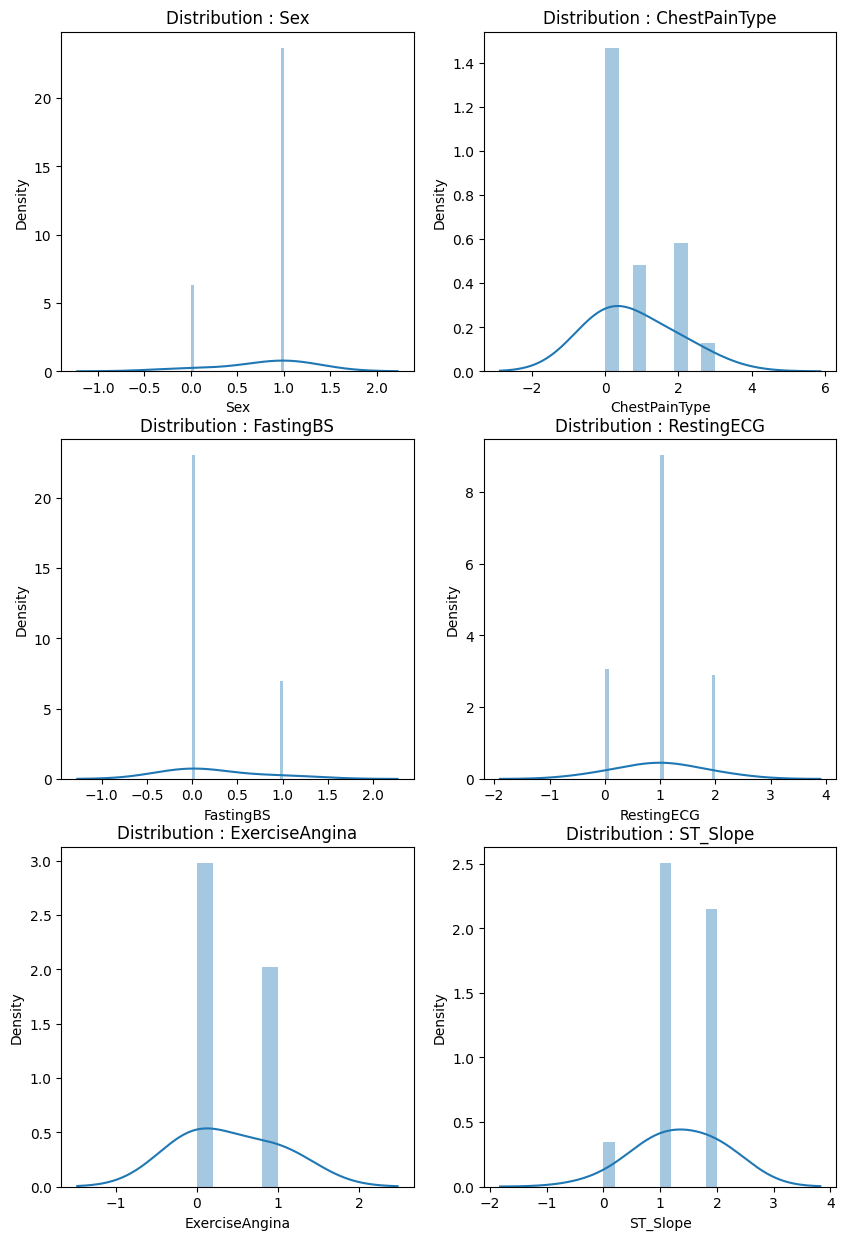

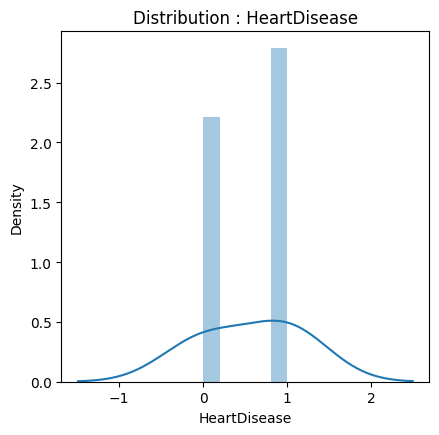

In [21]:
fig, ax = plt.subplots(nrows = 3,ncols = 2,figsize = (10,15))
for i in range(len(categorical_features) - 1):

    plt.subplot(3,2,i+1)
    sns.distplot(data_transformed[categorical_features[i]],kde_kws = {'bw' : 1});
    title = 'Distribution : ' + categorical_features[i]
    plt.title(title)

plt.figure(figsize = (4.75,4.55))
sns.distplot(data_transformed[categorical_features[len(categorical_features) - 1]],kde_kws = {'bw' : 1})
title = 'Distribution : ' + categorical_features[len(categorical_features) - 1]
plt.title(title);

- All the categorical features are near about **Normally Distributed**.

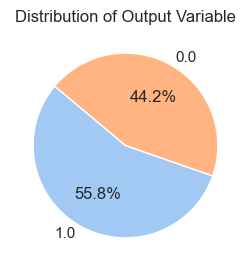

In [22]:
output_counts = data_transformed['HeartDisease'].value_counts()

# Plotting the pie chart using Seaborn
plt.figure(figsize=(3, 3))
sns.set(style="whitegrid")
sns.color_palette("pastel")
sns.set_palette("pastel")
plt.pie(output_counts, labels=output_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Output Variable')
plt.show()

<Axes: xlabel='HeartDisease'>

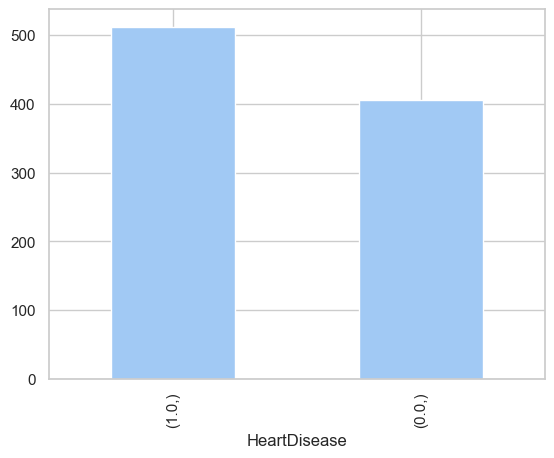

In [23]:
pd.DataFrame(df['HeartDisease']).value_counts().plot(kind = 'bar')

### Numerical Features :

#### Distribution of Numerical Features :

C:\Users\risha\AppData\Local\Temp\ipykernel_11268\1736006240.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[numerical_features[i]])
C:\Users\risha\AppData\Local\Temp\ipykernel_11268\1736006240.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[numerical_features[i]])
C:\Users\risha\A

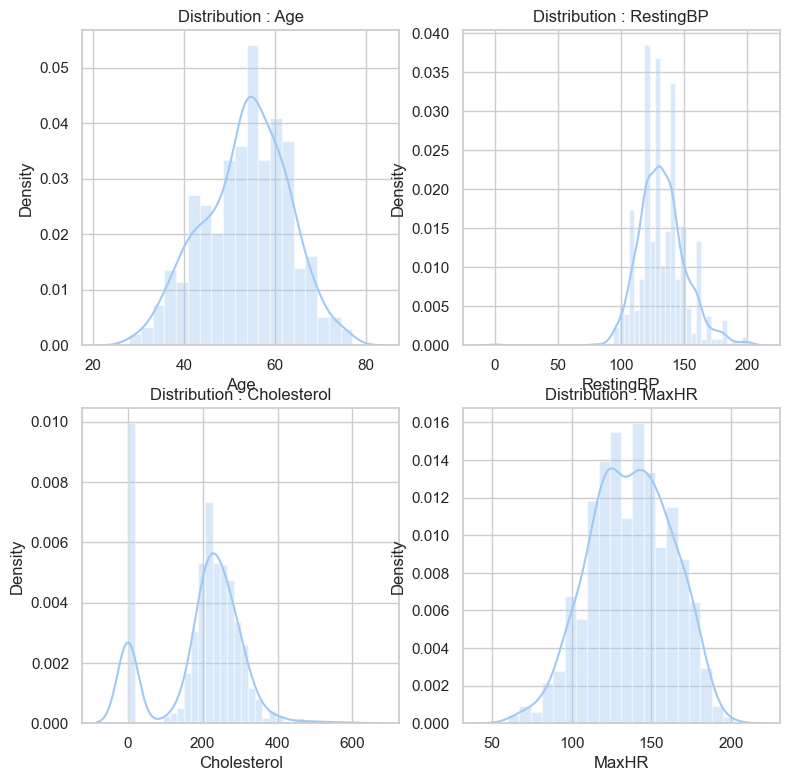

C:\Users\risha\AppData\Local\Temp\ipykernel_11268\1736006240.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_transformed[numerical_features[len(numerical_features) - 1]],kde_kws = {'bw' : 1})
C:\Users\risha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:2496: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=1`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, *

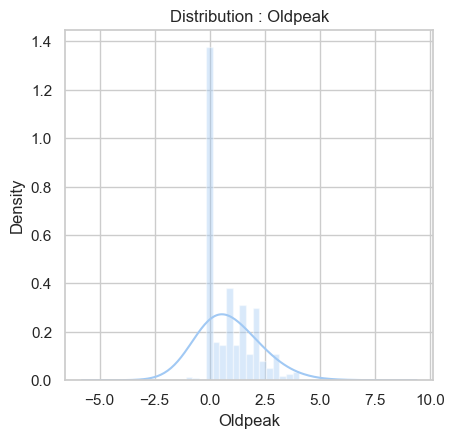

In [24]:
fig, ax = plt.subplots(nrows = 2,ncols = 2,figsize = (9,9))
for i in range(len(numerical_features) - 1):
    plt.subplot(2,2,i+1)
    sns.distplot(df[numerical_features[i]])
    title = 'Distribution : ' + numerical_features[i]
    plt.title(title)
plt.show()

plt.figure(figsize = (4.75,4.55))
sns.distplot(data_transformed[numerical_features[len(numerical_features) - 1]],kde_kws = {'bw' : 1})
title = 'Distribution : ' + numerical_features[len(numerical_features) - 1]
plt.title(title);

- **Oldpeak's** data distribution is rightly skewed.
- **Cholestrol** has a bidmodal data distribution.

# **Feature Engineering**

### Data Scaling :

- Machine learning model does not understand the units of the values of the features. It treats the input just as a simple number but does not understand the true meaning of that value. Thus, it becomes necessary to scale the data.

**Eg :** Age = Years; FastingBS = mg / dl

- We have 2 options for data scaling : 1) **Normalization** 2) **Standardization**. As most of the algorithms assume the data to be normally (Gaussian) distributed, **Normalization** is done for features whose data does not display normal distribution and **standardization** is carried out for features that are normally distributed where their values are huge or very small as compared to other features.


- **Normalization** : **Oldpeak** feature is normalized as it had displayed a right skewed data distribution.
- **Standardizarion** : **Age**, **RestingBP**, **Cholesterol** and **MaxHR** features are scaled down because these features are normally distributed.

In [25]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

#Oldpeak Age RestingBP Cholesterol MaxHR
data_transformed['Oldpeak'] = mms.fit_transform(data_transformed[['Oldpeak']])
data_transformed['Age'] = ss.fit_transform(data_transformed[['Age']])
data_transformed['RestingBP'] = ss.fit_transform(data_transformed[['RestingBP']])
data_transformed['Cholesterol'] = ss.fit_transform(data_transformed[['Cholesterol']])
data_transformed['MaxHR'] = ss.fit_transform(data_transformed[['MaxHR']])
data_transformed.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.461847,1,1,0.410909,0.831659,0,1,1.382928,0,0.295455,2,0.0
1,-0.495869,0,2,1.491752,-0.167524,0,1,0.754157,0,0.409091,1,1.0
2,-1.783840,1,1,-0.129513,0.776658,0,2,-1.525138,0,0.295455,2,0.0
3,-0.603200,0,0,0.302825,0.144148,0,1,-1.132156,1,0.465909,1,1.0
4,0.040786,1,2,0.951331,-0.030022,0,1,-0.581981,0,0.295455,2,0.0


### Correlation Matrix :

#### Calculating the correlation between numerical features

In [26]:
df[numerical_features].corr()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
Age,1.000000,0.248785,-0.091467,-0.373270,0.253896
RestingBP,0.248785,1.000000,0.099852,-0.112135,0.164803
Cholesterol,-0.091467,0.099852,1.000000,0.235308,0.046558
MaxHR,-0.373270,-0.112135,0.235308,1.000000,-0.160691
Oldpeak,0.253896,0.164803,0.046558,-0.160691,1.000000


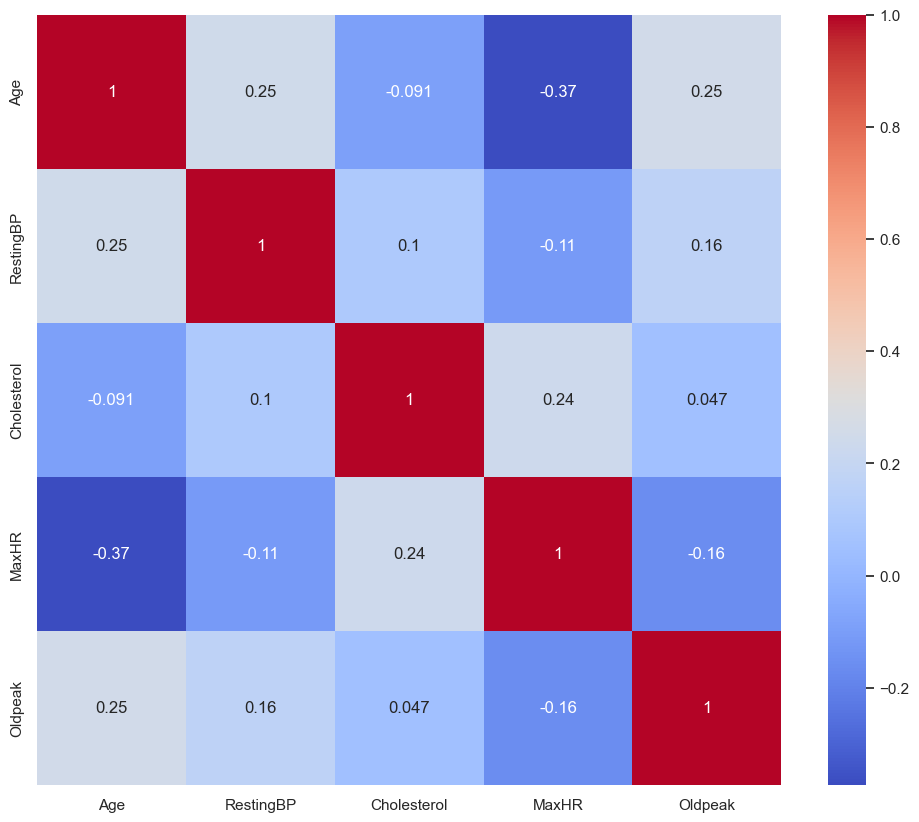

In [27]:
plt.figure(figsize=(12, 10)) 
sns.heatmap(df[numerical_features].corr(), cmap='coolwarm', annot=True)  
plt.show()  # Display the plot


### Feature Selection for Categorical Features :

A Chi-squared test is a statistical tool used to analyze **categorical data** and **assess relationships between them**. It helps us understand if the observed distribution of data in specific categories differs significantly from what we would expect if the variables were independent of each other.

1) **Test of independence:** This type of Chi-squared test is used to assess if two categorical variables are independent of each other. It compares the observed frequency of co-occurrences of categories from both variables against the expected frequency if they were independent. A significant difference between observed and expected co-occurrences suggests a dependence between the variables.

In [28]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [29]:
categorical_features

['Sex',
 'ChestPainType',
 'FastingBS',
 'RestingECG',
 'ExerciseAngina',
 'ST_Slope',
 'HeartDisease']

In [30]:
features = data_transformed[[feature for feature in categorical_features if feature != 'HeartDisease']]

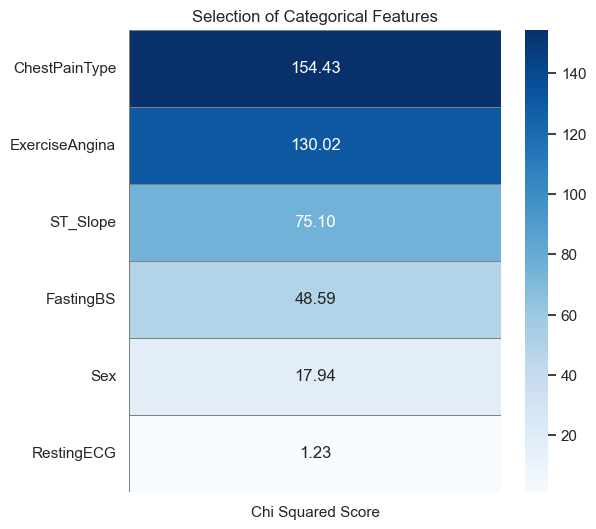

In [31]:
## selecting the features and target
features = data_transformed[[feature for feature in categorical_features if feature != 'HeartDisease']]
target = data_transformed["HeartDisease"]

''' Using selectKbest method for feature selection.
 It selects the top k features based on a provided scoring function. 
 In this case, chi2 is used as the scoring function, indicating the Chi-squared test. '''


best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features, target)

featureScores = pd.DataFrame(data = fit.scores_,index = features.columns,columns = ['Chi Squared Score'])

plt.subplots(figsize = (6,6))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Squared Score'),annot = True,
            cmap = "Blues",linewidths = 0.4,linecolor = 'grey',fmt = '.2f');
plt.title('Selection of Categorical Features');

### Feature Selection for Numerical Features :

#### ANOVA Test :


An **Analysis of Variance (ANOVA)** test is a statistical technique used to compare the means of two or more groups within a dataset. It helps us determine if there's a statistically significant difference between the means of these groups.

By comparing these means, ANOVA assesses if the differences between group means are likely due to random chance or if there's a true underlying effect.

In [32]:
numerical_features

['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

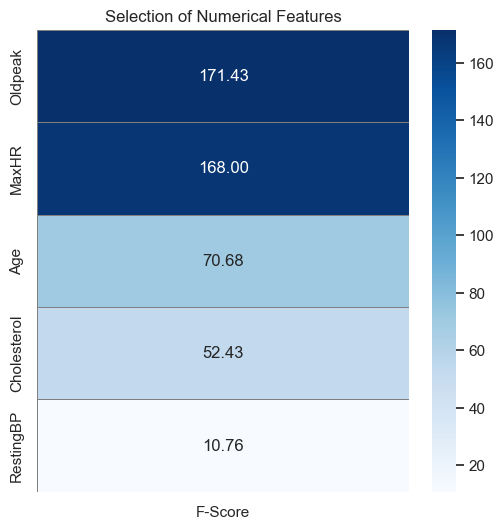

In [33]:
from sklearn.feature_selection import f_classif

features = data_transformed[numerical_features]
target = data_transformed['HeartDisease']

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = numerical_features,columns = ['F-Score'])

plt.subplots(figsize = (6,6))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'F-Score'),annot = True,cmap = "Blues",
            linewidths = 0.4,linecolor = 'grey',fmt = '.2f');
plt.title('Selection of Numerical Features');

#### Based on the chi square and ANOVA test we leave out RestingBP and Resting ECG for the modelling

# **Modeling**

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

### Selecting the necessary features and target 

In [35]:
features = data_transformed[data_transformed.columns.drop(["RestingBP","RestingECG","HeartDisease"])].values
target = data_transformed["HeartDisease"].values


### Splitting the data into train and test with 80-20 split

In [36]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.2 , random_state = 42)

#### Creating a function to run the algorithm and plot the ROC curve

In [37]:
def model(classifier):

    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 42)
    print("Accuracy : ",'{0:.2%}'.format(accuracy_score(y_test,prediction)))
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))
    fpr, tpr, thresholds = roc_curve(y_test,prediction)
    plt.plot(fpr, tpr, label='ROC curve')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.plot([0, 1], [0, 1], 'r--', label='No Discrimination')
    plt.legend()
    plt.show()


#### Creating a function to calculate the algortihm's confusion matrix and evaluate result

In [38]:

def model_evaluation(classifier):

    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = "Blues",fmt ='')

    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))

#### 1] Logistic Regression :

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
classifier_lr = LogisticRegression(random_state = 42,C=1,penalty= 'l2')

Accuracy :  84.78%
Cross Validation Score :  90.54%
ROC_AUC Score :  85.28%


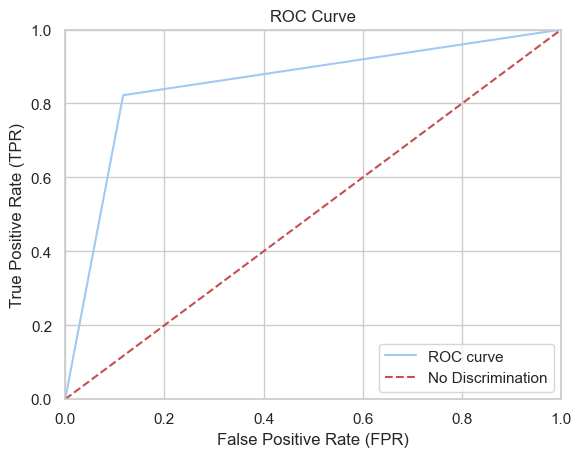

In [41]:
model(classifier_lr)

              precision    recall  f1-score   support

         0.0       0.78      0.88      0.83        77
         1.0       0.91      0.82      0.86       107

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



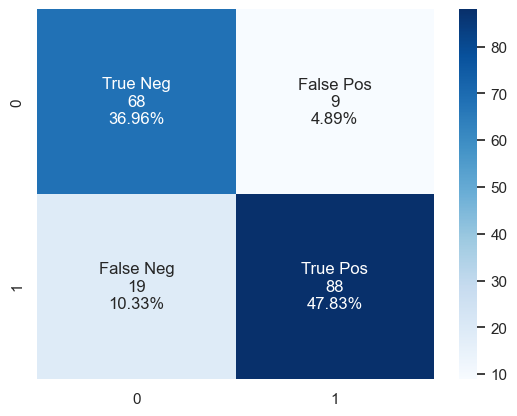

In [42]:
model_evaluation(classifier_lr)

#### 2) Decision Tree Classifier :

In [43]:
from sklearn.tree import DecisionTreeClassifier


In [44]:
classifier_dt = DecisionTreeClassifier(random_state = 42,max_depth = None,min_samples_leaf = 1)

Accuracy :  82.07%
Cross Validation Score :  78.22%
ROC_AUC Score :  82.58%


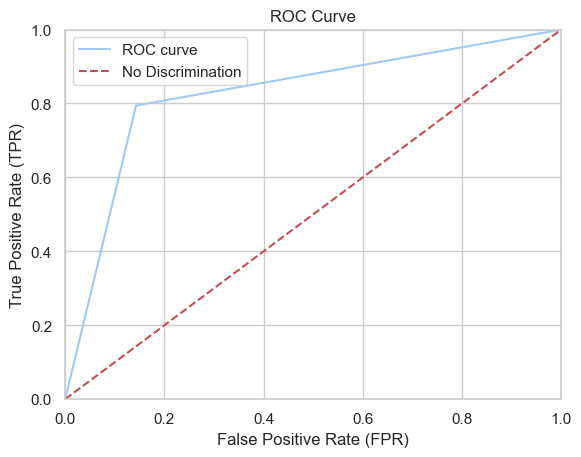

              precision    recall  f1-score   support

         0.0       0.75      0.86      0.80        77
         1.0       0.89      0.79      0.84       107

    accuracy                           0.82       184
   macro avg       0.82      0.83      0.82       184
weighted avg       0.83      0.82      0.82       184



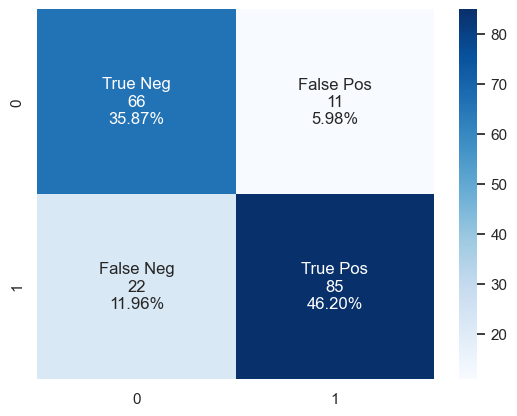

In [45]:
model(classifier_dt)
model_evaluation(classifier_dt)

#### 3] Random Forest Classifier :

In [46]:
from sklearn.ensemble import RandomForestClassifier

Accuracy :  85.87%
Cross Validation Score :  91.17%
ROC_AUC Score :  86.03%


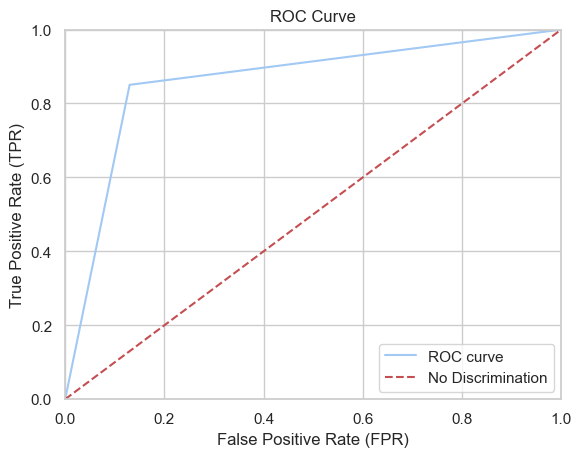

              precision    recall  f1-score   support

         0.0       0.81      0.87      0.84        77
         1.0       0.90      0.85      0.88       107

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



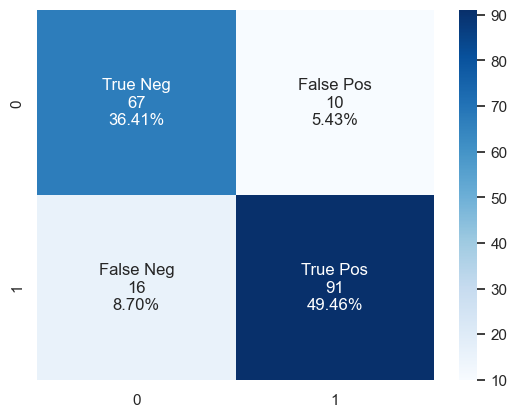

In [47]:
classifier_rf = RandomForestClassifier(max_depth = None,random_state = 42)
model(classifier_rf)
model_evaluation(classifier_rf)

### Alogrithm Results Table :

|Sr. No.|ML Algorithm|Accuracy|Cross Validation Score| 
|-|-|-|-|
|1|Logistic Regression|84.78%|90.54%| 
|2|Decision Tree Classifier|82.07%|78.22%|
|3|Random Forest Classifier|85.87%|91.17%|

### Conclusion

- We have used 3 different classifiers Logistic Regression, Decision Tree and Random Forest 
- In our case, false negatives hold a high weightage. A false negative means the model incorrectly predicts that a patient does not have a disease when they actually do. In the context of heart disease diagnosis, missing a person who actually has the disease (false negatives) can have severe consequences as it may delay necessary treatment and pose a risk to the patient's health. Therefore, minimizing false negatives is crucial in this scenario.


- As we can see from the above result, Random Forest Classifier has the highest accuracy **(85.87%)** and lowest false negative rate **(8.70%)**